2.Friendly Tasks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('abc.csv')

Matplotlib is building the font cache; this may take a moment.


Part A

In [2]:
# 1. View first 5 rows
print("First 5 rows:")
df.head()

First 5 rows:


,Product,Category,Price Before,Price After,Weight Before,Weight After,Date
0,Cheerioes,Cereals,349.73,321.7516,5.17,5.2217,1/8/2023
1,Mountain Dew,Beverages,103.17,99.0432,5.48,5.8636,12/9/2022
2,Whole Milk,Dairy,228.85,199.0995,3.36,3.6288,10/25/2022
3,Special K,Cereals,429.09,411.9264,4.84,5.1788,9/10/2022
4,Oreos,Snacks,444.48,382.2528,6.46,7.4290,8/26/2022


In [3]:
# 2. Shape, columns, data types
print("Shape:\n", df.shape)
print("\nColumns\n:", df.columns.tolist())
print("\nData types:\n", df.dtypes)

Shape:
 (100, 7)

Columns
: ['Product', 'Category', 'Price Before', 'Price After', 'Weight Before', 'Weight After', 'Date']

Data types:
 Product           object
Category          object
Price Before     float64
Price After      float64
Weight Before    float64
Weight After     float64
Date              object
dtype: object


In [4]:
# 3. Missing values & duplicates
print("Missing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Missing values:
 Product          0
Category         0
Price Before     0
Price After      0
Weight Before    0
Weight After     0
Date             0
dtype: int64

Duplicates: 0


In [5]:
# 4. Summary stats for numerical columns
print("Summary stats:\n", df.describe())

Summary stats:
        Price Before  Price After  Weight Before  Weight After
count    100.000000   100.000000     100.000000    100.000000
mean     270.460800   243.526199       4.405000      4.570820
std      138.376012   124.029937       1.350802      1.414995
min       50.040000    42.891500       2.040000      2.070400
25%      149.642500   132.454050       3.347500      3.495725
50%      272.610000   248.351550       4.340000      4.499550
75%      396.617500   354.867800       5.482500      5.739025
max      499.080000   446.183000       6.980000      7.429000


In [6]:
print(df.columns.tolist())


['Product', 'Category', 'Price Before', 'Price After', 'Weight Before', 'Weight After', 'Date']


Part B

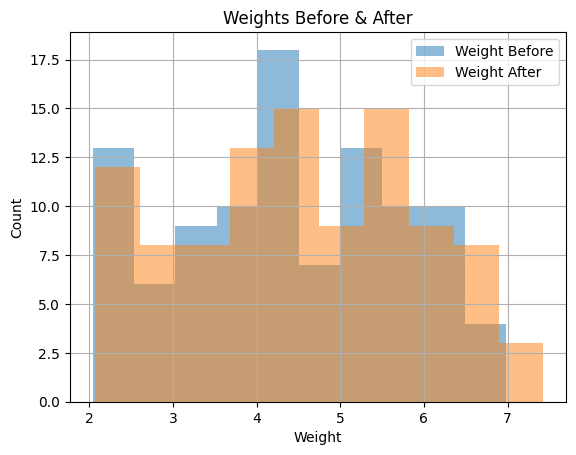

In [7]:
# Histogram: Weight Before & Weight After
df['Weight Before'].hist(alpha=0.5, label='Weight Before')
df['Weight After'].hist(alpha=0.5, label='Weight After')
plt.legend()
plt.title('Weights Before & After')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

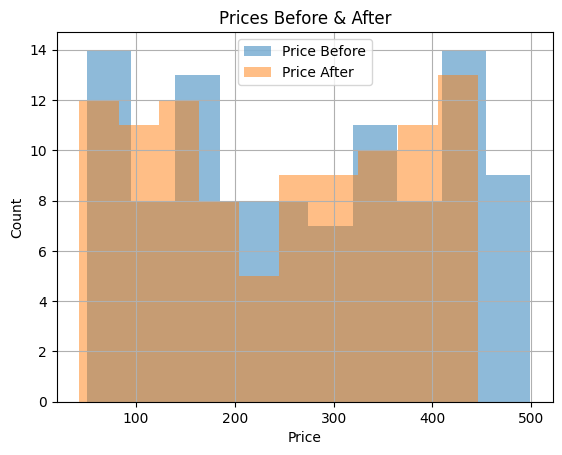

In [8]:
# Histogram: Price Before & Price After
df['Price Before'].hist(alpha=0.5, label='Price Before')
df['Price After'].hist(alpha=0.5, label='Price After')
plt.legend()
plt.title('Prices Before & After')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

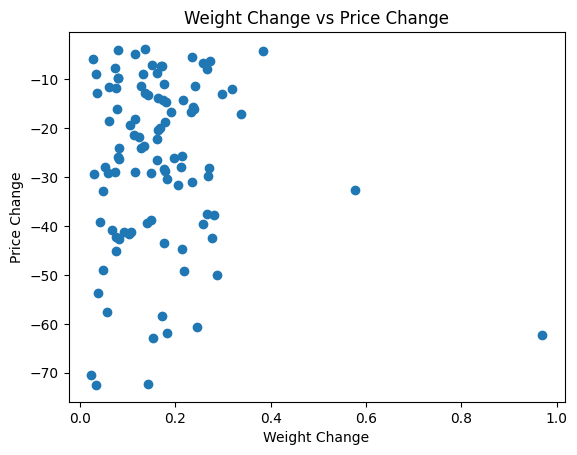

In [9]:
# Scatter: Weight Change vs. Price Change
plt.scatter(df['Weight After'] - df['Weight Before'], df['Price After'] - df['Price Before'])
plt.title('Weight Change vs Price Change')
plt.xlabel('Weight Change')
plt.ylabel('Price Change')
plt.show()

In [10]:
# Top 3 products with biggest weight drop
df['Weight Drop'] = df['Weight Before'] - df['Weight After']
print(df.nlargest(3, 'Weight Drop')[['Product', 'Weight Drop']])

           Product  Weight Drop
32           Fanta      -0.0235
98           Chips      -0.0271
38  Cheddar Cheese      -0.0304


In [11]:
# Top 3 products with biggest price increase
df['Price Increase'] = df['Price After'] - df['Price Before']
print(df.nlargest(3, 'Price Increase')[['Product', 'Price Increase']])


          Product  Price Increase
99  Rice Krispies         -3.7560
74    Corn Flakes         -4.0440
1    Mountain Dew         -4.1268


Part c

In [12]:
# Mean, median, std of weight change
df['Weight Change'] = df['Weight After'] - df['Weight Before']
print("Weight change mean:", df['Weight Change'].mean())
print("median:", df['Weight Change'].median())
print("std:", df['Weight Change'].std())

Weight change mean: 0.16581999999999994
median: 0.15225
std: 0.12179666612345297


In [13]:
# Correlation between weight and price % change
df['Weight Change %'] = ((df['Weight After'] - df['Weight Before']) / df['Weight Before']) * 100
df['Price Change %'] = ((df['Price After'] - df['Price Before']) / df['Price Before']) * 100

print("Correlation (weight vs price % change):", df['Weight Change %'].corr(df['Price Change %']))

Correlation (weight vs price % change): -0.014969262611405318


In [14]:
# Probability of shrinkflation event
shrinkflation = df[(df['Weight After'] < df['Weight Before']) & (df['Price After'] >= df['Price Before'])]
prob_shrink = len(shrinkflation) / len(df)
print("Probability of shrinkflation event:", prob_shrink)

Probability of shrinkflation event: 0.0


Part D

In [15]:
# 1. Size_Change_Percentage
df['Size_Change_Percentage'] = ((df['Weight After'] - df['Weight Before']) / df['Weight Before'])*100

# 2. Price_Change_Percentage
df['Price_Change_Percentage'] = ((df['Price After'] - df['Price Before']) / df['Price Before'])*100

# 3. Shrinkflation_Flag
df['Shrinkflation_Flag'] = ((df['Weight After'] < df['Weight Before']) & (df['Price After'] >= df['Price Before']))

# First, make sure your percentage columns are rounded to whole numbers
df['Size_Change_Percentage'] = df['Size_Change_Percentage'].round(0)
df['Price_Change_Percentage'] = df['Price_Change_Percentage'].round(0)

# Print the rounded results for each product
df[['Product', 'Category', 'Size_Change_Percentage', 'Price_Change_Percentage', 'Shrinkflation_Flag']]




,Product,Category,Size_Change_Percentage,Price_Change_Percentage,Shrinkflation_Flag
0,Cheerioes,Cereals,1.0,-8.0,False
1,Mountain Dew,Beverages,7.0,-4.0,False
2,Whole Milk,Dairy,8.0,-13.0,False
3,Special K,Cereals,7.0,-4.0,False
4,Oreos,Snacks,15.0,-14.0,False
...,...,...,...,...,...
95,Pretzels,Snacks,4.0,-6.0,False
96,Cheddar Cheese,Dairy,3.0,-12.0,False
97,Cream,Dairy,1.0,-12.0,False
98,Chips,Snacks,1.0,-6.0,False


Part E

In [16]:

result = df[['Product', 'Category', 'Size_Change_Percentage', 'Price_Change_Percentage', 'Shrinkflation_Flag']]

# Sort the result by product name
result = result.sort_values('Product')
print(result)


       Product Category  Size_Change_Percentage  Price_Change_Percentage  \
9       Butter    Dairy                     1.0                    -11.0   
15      Butter    Dairy                     4.0                     -9.0   
54      Butter    Dairy                     5.0                    -12.0   
58      Butter    Dairy                     5.0                    -13.0   
20      Butter    Dairy                     2.0                     -9.0   
..         ...      ...                     ...                      ...   
2   Whole Milk    Dairy                     8.0                    -13.0   
79      Yogurt    Dairy                     5.0                     -7.0   
13      Yogurt    Dairy                     1.0                    -12.0   
66      Yogurt    Dairy                     3.0                    -12.0   
10      Yogurt    Dairy                     3.0                    -15.0   

    Shrinkflation_Flag  
9                False  
15               False  
54          